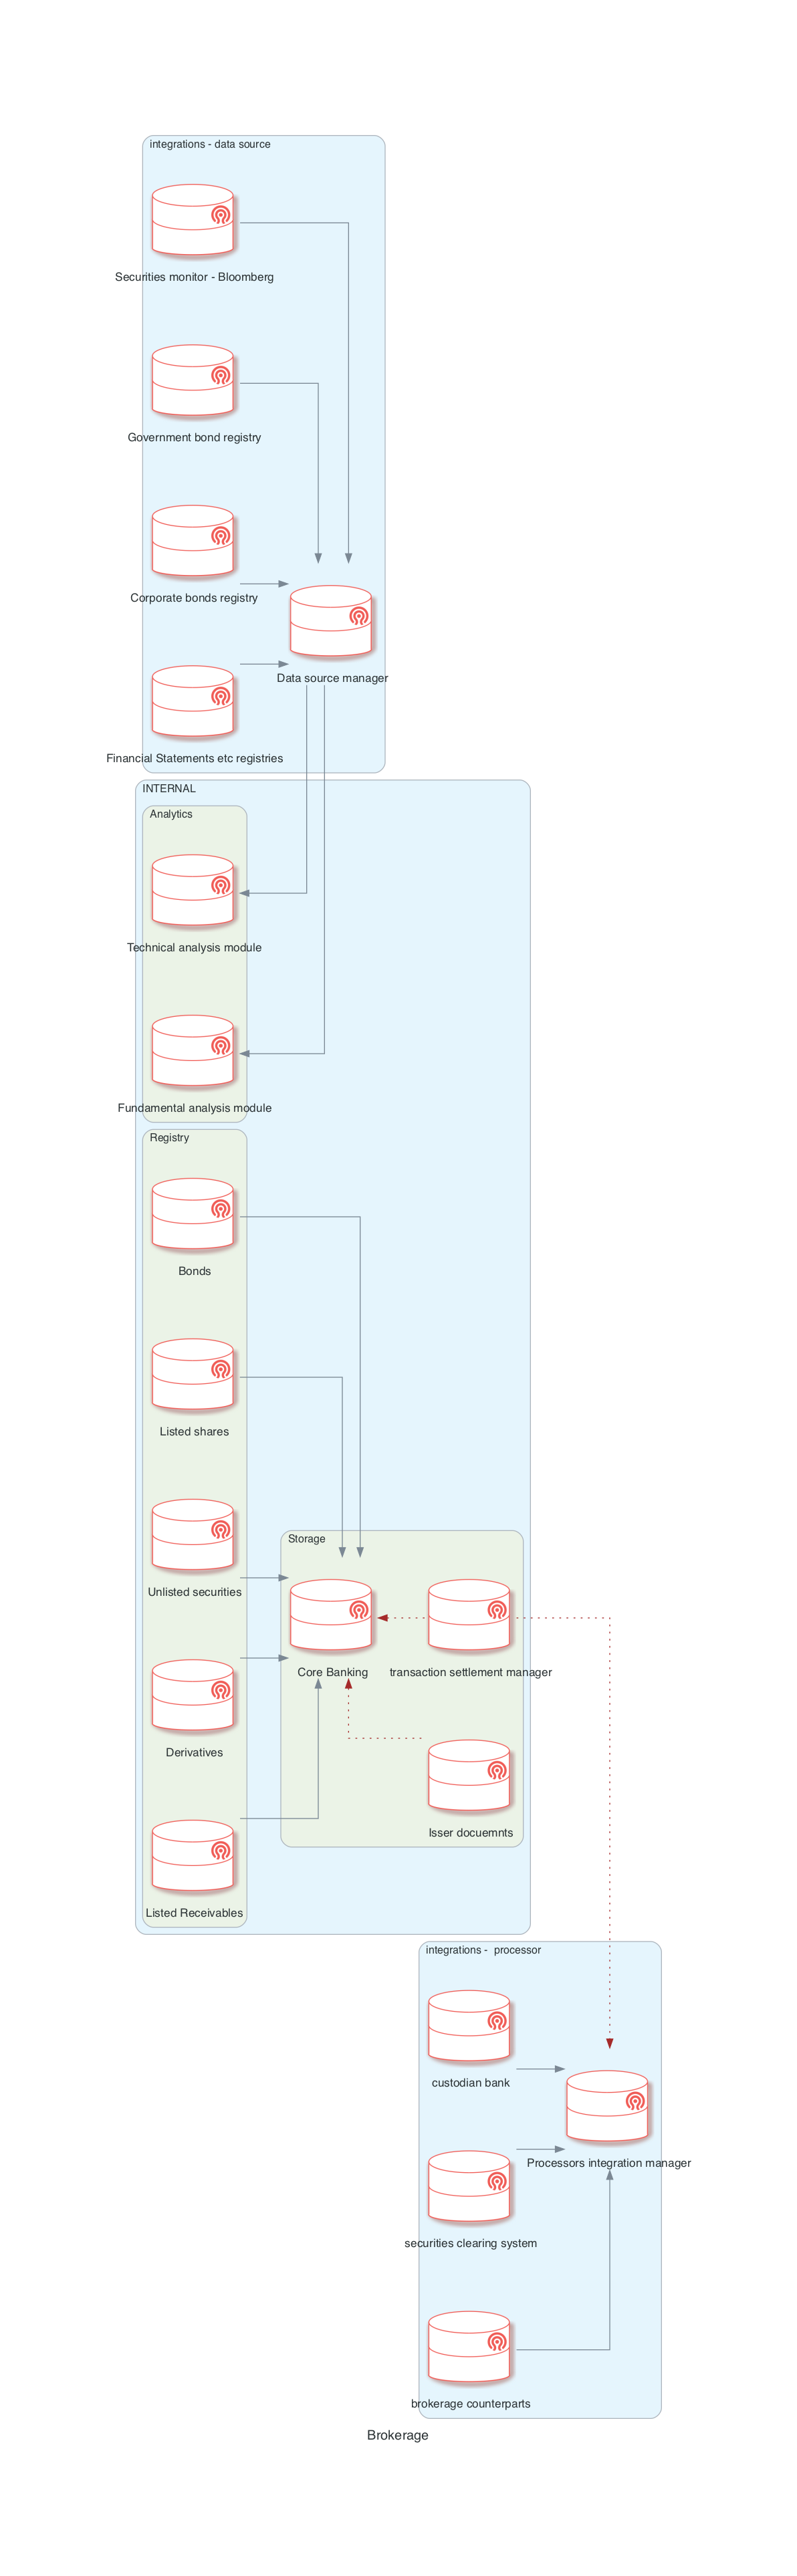

None

In [1]:
from IPython.display import display
from diagrams import Cluster, Diagram
from diagrams import Edge
from diagrams.aws.iot import IotBank
from diagrams.generic.compute import Rack
from diagrams.generic.device import Mobile
from diagrams.onprem.storage import CEPH_OSD
from diagrams.outscale.network import SiteToSiteVpng
from diagrams.outscale.security import IdentityAndAccessManagement, Firewall
from diagrams.programming.flowchart import Database


brokerage = ('Bonds', 'Listed shares', 'Unlisted securities', 'Derivatives', 'Listed Receivables')

# transations = ('Clearing house integrations',)

def diagram_brokerage(brokerage=None):
    brokerage_args = brokerage

    if brokerage_args:
        with Diagram("Brokerage", show=False, direction="LR") as diag_brokerage:

            with Cluster("integrations - data source"):
                mds = CEPH_OSD("Data source manager")

                smb = CEPH_OSD("Securities monitor - Bloomberg")
                smb >> mds

                pubi = CEPH_OSD("Government bond registry")
                pubi >> mds

                corp = CEPH_OSD("Corporate bonds registry")
                corp >> mds

                fsdb = CEPH_OSD("Financial Statements etc registries")
                fsdb >> mds

            with Cluster("integrations -  processor"):
                fsdb = CEPH_OSD("custodian bank")
                scs = CEPH_OSD("securities clearing system")
                part = CEPH_OSD("brokerage counterparts")

                intm = CEPH_OSD("Processors integration manager")

                [fsdb, scs, part] >> intm

            with Cluster("INTERNAL"):
                with Cluster("Storage"):
                    cbs = CEPH_OSD("Core Banking")
                    documents = CEPH_OSD("Isser docuemnts")

                    cbs << Edge(color="brown", style="dotted") << documents

                with Cluster("Storage"):
                    trs = CEPH_OSD("transaction settlement manager")

                    cbs << Edge(color="brown", style="dotted") << trs
                    trs >> Edge(color="brown", style="dotted") >> intm

                with Cluster("Registry"):
                    if "Bonds" in brokerage_args:
                        bon = CEPH_OSD("Bonds")
                        bon >> cbs

                    if "Listed shares" in brokerage_args:
                        list = CEPH_OSD("Listed shares")
                        list >> cbs

                    if "Unlisted securities" in brokerage_args:
                        uns = CEPH_OSD("Unlisted securities")
                        uns >> cbs

                    if "Derivatives" in brokerage_args:
                        der = CEPH_OSD("Derivatives")
                        der >> cbs

                    if "Listed Receivables" in brokerage_args:
                        lrec = CEPH_OSD("Listed Receivables")
                        lrec >> cbs

                with Cluster("Analytics"):
                    ta = CEPH_OSD("Technical analysis module") << mds
                    fa = CEPH_OSD("Fundamental analysis module") << mds



        display(diag_brokerage)

graf = diagram_brokerage(brokerage=brokerage)
display(graf)